In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly

In [ ]:
import random
samples_number = 100000           # no of training samples

inputs_number = 4             # input number (n=4)

inputs = np.random.uniform(-20, 20, size = (samples_number, inputs_number))      
""""
    np.random.uniform gives the values in between -20 to 20 with size of (100000, 4)
"""
rosenbrock = []     # list created to append the values from the function below

for j in range (samples_number):     #range(0, 10000)-----> j from  0 to 9999
    
    r = 0      # intilization of function value
    for i in range(inputs_number-1):         #range(3)----->   i from 0 to 2
        
        r += (1.0 - inputs[j][i])**2+100.0*((inputs[j][i+1]-((inputs[j][i])**2)))
        
    rosenbrock.append(r)    # append the value of r for each iteration to the above empty list created


In [ ]:
rosenbrock

In [ ]:
data = pd.concat([pd.DataFrame(inputs),pd.DataFrame(rosenbrock)], axis=1)     # concat is used to concat two dataframe into one ....axis= 1---> row wise
data.to_excel("/content/sample_data/Data_for_ANN_by_random.xlsx",index = False)       # saving the dataframe to csv format      

In [ ]:
data= pd.read_excel("/content/Data_for_ANN_by_random.xlsx")    # reading the dataset

In [ ]:
data.columns=["x1", "x2", "x3", "x4", "Y"]     # assigning of column names

In [ ]:
data

,x1,x2,x3,x4,Y
0,4.397782,-17.507953,-4.209644,-19.352454,-38084.776451
1,16.014409,14.391434,-14.784123,-19.602269,-69560.091696
2,3.809905,-9.825230,2.435376,-18.981374,-14208.138412
3,-15.174677,11.729827,-1.598872,-4.003253,-36045.332512
4,-19.482884,12.012411,14.239277,-18.478627,-71170.374898
...,...,...,...,...,...
99995,-2.506507,-2.817178,-10.403350,17.360081,-11674.017691
99996,-3.809192,12.348792,17.324509,-17.881405,-45116.520390
99997,1.466390,-6.425318,-13.627236,15.891155,-23060.487272
99998,-14.226082,-15.599733,-16.634710,-14.131892,-76062.930549


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()        # Here minmaxscaler is one of technique which can be used for Normalizing the data to same scale
scaled_data= scaler.fit_transform(data.values) # output form: array

In [ ]:
scaled_data

array([[0.60994908, 0.06229366, 0.39475919, 0.01618833, 0.6734073 ],
       [0.90037018, 0.85979597, 0.13039296, 0.00994293, 0.41414529],
       [0.59525188, 0.25436599, 0.56088736, 0.02546539, 0.87007904],
       ...,
       [0.53666291, 0.33936566, 0.1593156 , 0.89728423, 0.79716229],
       [0.14434381, 0.11000022, 0.08412752, 0.14670323, 0.36058144],
       [0.8901271 , 0.29741139, 0.53890734, 0.62413534, 0.73159049]])

In [ ]:
scaled_data.shape

(100000, 5)

In [ ]:
X= scaled_data[:, 0:4]
Y= scaled_data[:, 4]          # slicing of required input and output

In [ ]:
X

array([[0.60994908, 0.06229366, 0.39475919, 0.01618833],
       [0.90037018, 0.85979597, 0.13039296, 0.00994293],
       [0.59525188, 0.25436599, 0.56088736, 0.02546539],
       ...,
       [0.53666291, 0.33936566, 0.1593156 , 0.89728423],
       [0.14434381, 0.11000022, 0.08412752, 0.14670323],
       [0.8901271 , 0.29741139, 0.53890734, 0.62413534]])

In [ ]:
Y

array([0.6734073 , 0.41414529, 0.87007904, ..., 0.79716229, 0.36058144,
       0.73159049])

In [ ]:
from sklearn.model_selection import train_test_split    # import of train_test_split

In [ ]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.7)     # train_size= 70%----->7000 training samples


In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size= 0.5)    # test_size==15% ----> 2550 training samples

In [ ]:
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)          # shapes of each set of splitted data
print(X_test.shape), print(y_test.shape)

(70000, 4)
(70000,)
(15000, 4)
(15000,)
(15000, 4)
(15000,)


(None, None)

# Adam with case 4 random Samples of 70000

In [ ]:
from tensorflow import keras    

def create_nn():     #function of NN model creation
    # Input layer
    inputs = keras.Input(shape=(X.shape[1],), name='input')      # Since n= 4,  in input layer shape= 4--->X.shape[1]

    # Dense layers                                              # hidden layers
    layers_dense = keras.layers.Dense(1000, 'relu')(inputs)          # here 20(nodes) --->units    # Activation_function -->sigmoid
    layers_dense = keras.layers.Dense(2000, 'relu')(layers_dense)  
    layers_dense = keras.layers.Dense(2000, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(1, 'linear')(layers_dense)
    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)              # only one node for output layer

    return keras.Model(inputs=inputs, outputs=outputs, name="Prediction")

model = create_nn()

In [ ]:
model.summary()      # return the summary of all layers of model

Model: "Prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dense_1 (Dense)             (None, 2000)              2002000   
                                                                 
 dense_2 (Dense)             (None, 2000)              4002000   
                                                                 
 dense_3 (Dense)             (None, 1)                 2001      
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6,011,003
Trainable params: 6,011,003
Non-

In [ ]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss='mse',      #mse---> mean square error
                  metrics=[keras.metrics.RootMeanSquaredError()])
compile_model(model)

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100)    # epochs--->iteration

Epoch 1/100
2188/2188 [==============================] - 11s 4ms/step - loss: 0.0020 - root_mean_squared_error: 0.0452
Epoch 2/100
2188/2188 [==============================] - 8s 4ms/step - loss: 1.5256e-04 - root_mean_squared_error: 0.0124
Epoch 3/100
2188/2188 [==============================] - 9s 4ms/step - loss: 1.1422e-04 - root_mean_squared_error: 0.0107
Epoch 4/100
2188/2188 [==============================] - 10s 5ms/step - loss: 1.0865e-04 - root_mean_squared_error: 0.0104
Epoch 5/100
2188/2188 [==============================] - 8s 4ms/step - loss: 8.7303e-05 - root_mean_squared_error: 0.0093
Epoch 6/100
2188/2188 [==============================] - 8s 4ms/step - loss: 6.5629e-05 - root_mean_squared_error: 0.0081
Epoch 7/100
2188/2188 [==============================] - 8s 4ms/step - loss: 6.1498e-05 - root_mean_squared_error: 0.0078
Epoch 8/100
2188/2188 [==============================] - 8s 4ms/step - loss: 6.1013e-05 - root_mean_squared_error: 0.0078
Epoch 9/100
2188/2188 [===

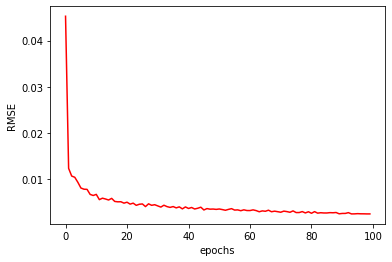

In [ ]:
def plot_history(metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics], color= "r")
    plt.xlabel("epochs")
    plt.ylabel("RMSE")
plot_history('root_mean_squared_error')

In [ ]:
y_train_predicted = model.predict(X_train)     # y_train predicted
y_test_predicted = model.predict(X_test)      #  y_test_predicted

469/469 [==============================] - 1s 1ms/step


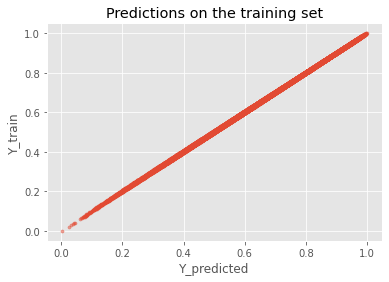

In [ ]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot') 
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("Y_predicted")
    plt.ylabel("Y_train")                          # sactter plot for Y_train_predicted and True_Y_train
    plt.title(title)

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

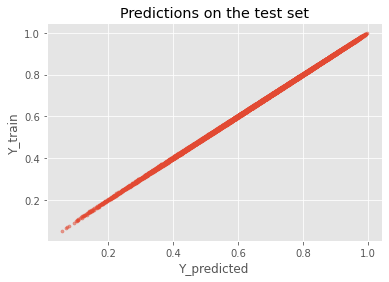

In [ ]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')    # Plot between Y_test_predicted and True_Y_test_predicted

In [ ]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
test_metrics = model.evaluate(X_test, y_test, return_dict=True)
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(train_metrics['root_mean_squared_error'], test_metrics['root_mean_squared_error']))

469/469 [==============================] - 1s 2ms/step - loss: 3.7020e-06 - root_mean_squared_error: 0.0019
Train RMSE: 0.00, Test RMSE: 0.00


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,                # Training of Model along with Validation data
                    epochs=150,
                    validation_data=(X_valid, y_valid))

Epoch 1/150
2188/2188 [==============================] - 9s 4ms/step - loss: 6.2198e-06 - root_mean_squared_error: 0.0025 - val_loss: 2.5361e-06 - val_root_mean_squared_error: 0.0016
Epoch 2/150
2188/2188 [==============================] - 9s 4ms/step - loss: 5.5561e-06 - root_mean_squared_error: 0.0024 - val_loss: 1.1546e-05 - val_root_mean_squared_error: 0.0034
Epoch 3/150
2188/2188 [==============================] - 9s 4ms/step - loss: 6.1673e-06 - root_mean_squared_error: 0.0025 - val_loss: 8.9853e-06 - val_root_mean_squared_error: 0.0030
Epoch 4/150
2188/2188 [==============================] - 9s 4ms/step - loss: 6.3624e-06 - root_mean_squared_error: 0.0025 - val_loss: 7.2779e-06 - val_root_mean_squared_error: 0.0027
Epoch 5/150
2188/2188 [==============================] - 9s 4ms/step - loss: 5.6686e-06 - root_mean_squared_error: 0.0024 - val_loss: 1.7703e-06 - val_root_mean_squared_error: 0.0013
Epoch 6/150
2188/2188 [==============================] - 9s 4ms/step - loss: 5.6243e-

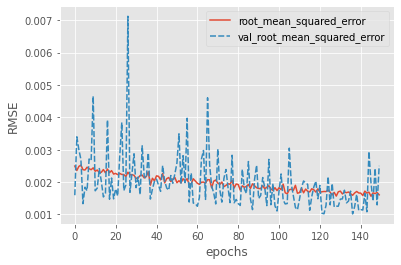

In [ ]:
plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])   

In [ ]:
from sklearn.metrics import r2_score
r2_score_training_set_for_adam_model_case_4= r2_score(y_train, y_train_predicted)
print("the R2 score for training set of the adam model case 4 is :", r2_score_training_set_for_adam_model_case_4)

the R2 score for training set of the adam model case 4 is : 0.9998714616998684


In [ ]:
r2_score_testing_set_adam_model_case_4= r2_score(y_test, y_test_predicted)
print("the r2 score for testing set of adam model case 4 is:", r2_score_testing_set_adam_model_case_4)

the r2 score for testing set of adam model case 4 is: 0.999870500182059


# RMSprop Model case 4 with random 70000 samples

In [ ]:
from tensorflow import keras    

def create_nn():     #function of NN model creation
    # Input layer
    inputs = keras.Input(shape=(X.shape[1],), name='input')      # Since n= 4,  in input layer shape= 4--->X.shape[1]

    # Dense layers                                              # hidden layers
    layers_dense = keras.layers.Dense(1000, 'relu')(inputs)          # here 20(nodes) --->units    # Activation_function -->sigmoid
    layers_dense = keras.layers.Dense(2000, 'relu')(layers_dense)  
    layers_dense = keras.layers.Dense(2000, 'relu')(layers_dense)
    layers_dense = keras.layers.Dense(1, 'linear')(layers_dense)                                                               # here 50(nodes) --->units    # Activation_function---->linear

    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)              # only one node for output layer

    return keras.Model(inputs=inputs, outputs=outputs, name="Prediction")

model = create_nn()

In [ ]:
model.summary()      # return the summary of all layers of model

Model: "Prediction"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 dense_10 (Dense)            (None, 1000)              5000      
                                                                 
 dense_11 (Dense)            (None, 2000)              2002000   
                                                                 
 dense_12 (Dense)            (None, 2000)              4002000   
                                                                 
 dense_13 (Dense)            (None, 1)                 2001      
                                                                 
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6,011,003
Trainable params: 6,011,003
Non-

In [ ]:
def compile_model(model):
    model.compile(optimizer='RMSprop',
                  loss='mse',      #mse---> mean square error
                  metrics=[keras.metrics.RootMeanSquaredError()])
compile_model(model)

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100)    # epochs--->iteration

Epoch 1/100
2188/2188 [==============================] - 13s 5ms/step - loss: 0.0075 - root_mean_squared_error: 0.0865
Epoch 2/100
2188/2188 [==============================] - 11s 5ms/step - loss: 0.0012 - root_mean_squared_error: 0.0348
Epoch 3/100
2188/2188 [==============================] - 11s 5ms/step - loss: 8.4758e-04 - root_mean_squared_error: 0.0291
Epoch 4/100
2188/2188 [==============================] - 11s 5ms/step - loss: 6.5938e-04 - root_mean_squared_error: 0.0257
Epoch 5/100
2188/2188 [==============================] - 11s 5ms/step - loss: 5.4639e-04 - root_mean_squared_error: 0.0234
Epoch 6/100
2188/2188 [==============================] - 11s 5ms/step - loss: 4.6050e-04 - root_mean_squared_error: 0.0215
Epoch 7/100
2188/2188 [==============================] - 11s 5ms/step - loss: 3.9957e-04 - root_mean_squared_error: 0.0200
Epoch 8/100
2188/2188 [==============================] - 11s 5ms/step - loss: 3.5080e-04 - root_mean_squared_error: 0.0187
Epoch 9/100
2188/2188 [=

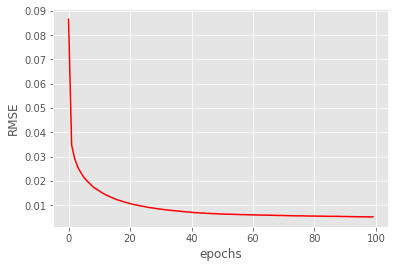

In [ ]:
def plot_history(metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics], color= "r")
    plt.xlabel("epochs")
    plt.ylabel("RMSE")
plot_history('root_mean_squared_error')

In [ ]:
y_train_predicted = model.predict(X_train)     # y_train predicted
y_test_predicted = model.predict(X_test)      #  y_test_predicted

469/469 [==============================] - 1s 1ms/step


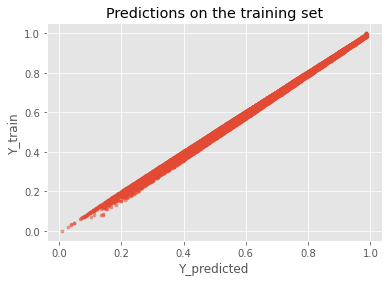

In [ ]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot') 
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("Y_predicted")
    plt.ylabel("Y_train")                          # sactter plot for Y_train_predicted and True_Y_train
    plt.title(title)

plot_predictions(y_train_predicted, y_train, title='Predictions on the training set')

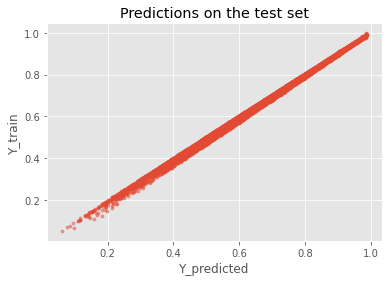

In [ ]:
plot_predictions(y_test_predicted, y_test, title='Predictions on the test set')    # Plot between Y_test_predicted and True_Y_test_predicted

In [ ]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
test_metrics = model.evaluate(X_test, y_test, return_dict=True)
print('Train RMSE: {:.2f}, Test RMSE: {:.2f}'.format(train_metrics['root_mean_squared_error'], test_metrics['root_mean_squared_error']))

469/469 [==============================] - 1s 2ms/step - loss: 7.9339e-05 - root_mean_squared_error: 0.0089
Train RMSE: 0.01, Test RMSE: 0.01


In [ ]:
history = model.fit(X_train, y_train,
                    batch_size=32,                # Training of Model along with Validation data
                    epochs=150,
                    validation_data=(X_valid, y_valid))

Epoch 1/150
2188/2188 [==============================] - 12s 5ms/step - loss: 2.6457e-05 - root_mean_squared_error: 0.0051 - val_loss: 2.6622e-05 - val_root_mean_squared_error: 0.0052
Epoch 2/150
2188/2188 [==============================] - 12s 6ms/step - loss: 2.6404e-05 - root_mean_squared_error: 0.0051 - val_loss: 3.7178e-05 - val_root_mean_squared_error: 0.0061
Epoch 3/150
2188/2188 [==============================] - 12s 6ms/step - loss: 2.5977e-05 - root_mean_squared_error: 0.0051 - val_loss: 1.7474e-05 - val_root_mean_squared_error: 0.0042
Epoch 4/150
2188/2188 [==============================] - 12s 5ms/step - loss: 2.6325e-05 - root_mean_squared_error: 0.0051 - val_loss: 1.9657e-05 - val_root_mean_squared_error: 0.0044
Epoch 5/150
2188/2188 [==============================] - 12s 6ms/step - loss: 2.5820e-05 - root_mean_squared_error: 0.0051 - val_loss: 4.0663e-05 - val_root_mean_squared_error: 0.0064
Epoch 6/150
2188/2188 [==============================] - 12s 5ms/step - loss: 2.

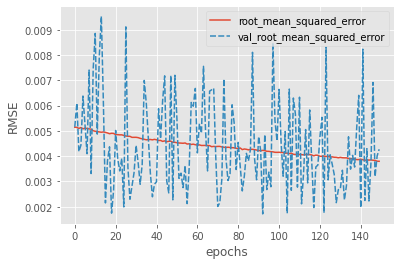

In [ ]:
plot_history(['root_mean_squared_error', 'val_root_mean_squared_error'])   

In [ ]:
from sklearn.metrics import r2_score
r2_score_training_set_for_RMSprop_model_case_4= r2_score(y_train, y_train_predicted)
print("the R2 score for training set of the RMSprop model case 4 is :", r2_score_training_set_for_RMSprop_model_case_4)

the R2 score for training set of the RMSprop model case 4 is : 0.9971369822209761


In [ ]:
r2_score_testing_set_RMSprop_model_case_4= r2_score(y_test, y_test_predicted)
print("the r2 score for testing set of RMSprop model case 4 is:", r2_score_testing_set_RMSprop_model_case_4)

the r2 score for testing set of RMSprop model case 4 is: 0.9972246320763583
